In [2]:
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from tabulate import tabulate
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import *
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.electronic_structure import plotter

with MPRester("AQwsCqxPeioMztVOij") as m:        
    struct = m.get_structure_by_material_id("mp-961774")

1. : Bande Interdite :

In [3]:
bs = m.get_bandstructure_by_material_id("mp-961774")
gap = bs.get_band_gap()
print ("Il y a une bande interdite directe" if gap['direct'] == True else "Il y a une bande interdite indirecte")
print("L’énergie de la bande interdite est de ",round(gap['energy'],4),"eV")
print("Le vecteur de transition est",gap['transition'])

Il y a une bande interdite indirecte
L’énergie de la bande interdite est de  0.4229 eV
Le vecteur de transition est \Gamma-X


2. Dispersion maximale et minimale de la dernière bande de valence et la première bande conduction :

La plus grande dispersion pour la dernière bande de valence :  3.4632722312437854
La plus grande dispersion pour la première bande de conduction:  4.241690196204529
La plus faible dispersion pour la première bande de valence:  0.12477367261658846
La plus faible dispersion pour la première bande de conduction:  0.03807806902741497


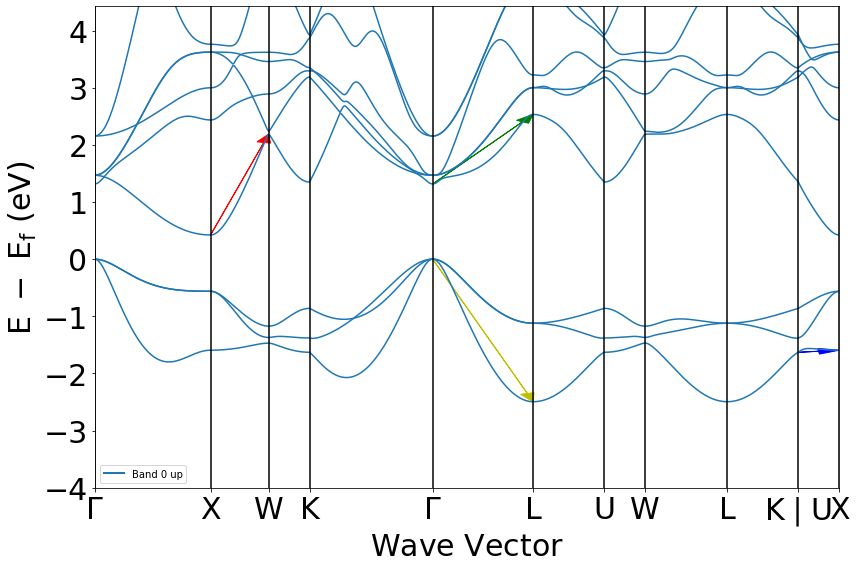

In [4]:
data = plotter.BSPlotter(bs).bs_plot_data()
E = data.get('energy')
D = data.get('ticks').get('distance')
#on retire les doublons dans le vecteur D
D = np.array([D[0], D[1], D[3], D[5], D[7], D[9], D[11], D[13], D[15], D[17], D[18]])

vbm = bs.get_vbm()
cbm = bs.get_cbm()
cbmlist = []
vbmlist = []
cbm_band_index = cbm["band_index"].items()
vbm_band_index = vbm["band_index"].items()

for cursor in cbm_band_index:
    cbmlist.append(cursor[1][0])
for cursor in vbm_band_index:
    vbmlist.append(cursor[1][0])
vm = vbmlist[-1]
cm = cbmlist[0]


dx = np.zeros(len(D)-1)
dyc = np.zeros(len(D)-1)
dyv = np.zeros(len(D)-1)
mc = np.zeros(len(D)-1)
mv = np.zeros(len(D)-1)

for i in range(len(D)-1):
    dx[i] = D[i+1] - D[i]
    dyv[i] =E.get('1')[i][vm][-1] - E.get('1')[i][vm][0]
    dyc[i] =E.get('1')[i][cm][-1] - E.get('1')[i][cm][0]
    mv[i] = dyv[i]/dx[i] 
    mc[i] = dyc[i]/dx[i]
    
mxV = np.max(abs(mv))    
mxC = np.max(abs(mc))   
mnV = np.min(abs(mv))   
mnC = np.min(abs(mc))
print("La plus grande dispersion pour la dernière bande de valence : ", mxV)
print("La plus grande dispersion pour la première bande de conduction: ", mxC)
print("La plus faible dispersion pour la première bande de valence: ", mnV)
print("La plus faible dispersion pour la première bande de conduction: ", mnC)

BSPlotter(bs).get_plot()
plt.arrow(D[4], (E.get('1')[4][vm])[0], dx[4], dyv[4], color = 'y', head_width = 0.1,length_includes_head=True)
plt.arrow(D[1], (E.get('1')[1][cm])[0], dx[1], dyc[1], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(D[4], (E.get('1')[4][cm])[0], dx[4], dyc[4], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(D[9], (E.get('1')[9][vm])[0], dx[9], dyv[9], color = 'b', head_width = 0.1,length_includes_head=True)
plt.show()

3. masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction :

Nous allons supposer une dispersion parabolique. Voici la formule de la masse effective :
    $$\Bigg(\frac{1}{m_{i,j}}\Bigg) = \frac{1}{\hbar^{2}}\frac{\partial{E}^{2}}{\partial{k_{i}}\partial{k_{j}}}$$

In [9]:
#constante de Planck :
h_bar = 6.5821e-16


Ev = vbm['energy']
kpoint_v = vbm.get('kpoint').frac_coords
norm_kv = np.linalg.norm(kpoint_v)
print('Pour la bande de valence, la valeur de la norme = ',norm_kv)
#si on suppose une dispersion parabolique :
masse_v = (h_bar**2 * (kpoint_v[0]**2+kpoint_v[1]**2+kpoint_v[2]**2))/(2*abs(Ev))
print('La masse effective au sommet de la dernière bande de valence = ',masse_v,' kg')

Ec = cbm['energy']
kpoint_c = cbm.get('kpoint').frac_coords
norm_kc = np.linalg.norm(kpoint_c)
print('Pour la bande de conduction, la valeur de la norme = ',norm_kc)
#si on suppose une dispersion parabolique :
masse_c = (h_bar**2 * (kpoint_c[0]**2+kpoint_c[1]**2+kpoint_c[2]**2))/(2*Ec)
print('La masse effective à la base de la première bande de conduction = ',masse_c,' kg')

Pour la bande de valence, la valeur de la norme =  0.0
La masse effective au sommet de la dernière bande de valence =  0.0  kg
Pour la bande de conduction, la valeur de la norme =  0.7071067811865476
La masse effective à la base de la première bande de conduction =  3.3918984412188394e-32  kg
